<a href="https://colab.research.google.com/github/simseoyoung/Deep-Learning/blob/main/CH.2/Chap2_2)_Multi_Class_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi Class Classification with MLP

In [2]:
import torch
import torch.nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F

import matplotlib.pyplot as plt

## 1) Data

#### <Mnist 데이터셋>
- Modified National Institute of Standards and Technology의 약자
- 머신러닝의 잘 알려진 데이터셋 중 하나
- NIST의 인구조사국 직원과 미국 중고등학생의 손글씨로 쓴 숫자 이미지 데이터
- Train Samples : 60,000 장  
  Test Samples  : 10,000 장
- 흑백이미지(Gray Scale) 데이터로 0~255(0:블랙, 255:화이트)의 값으로 구성되어있음
- 이미지 사이즈는 28x28 = 784

![MnistExamples.png](attachment:MnistExamples.png)

In [3]:
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform = transforms.ToTensor(), download=True )



test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform = transforms.ToTensor(), download=True)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [5]:
# Data loader
batch_size = 100

train_loader = torch.utils.data.DataLoader( dataset= train_dataset, batch_size= batch_size, shuffle=True )

test_loader = torch.utils.data.DataLoader( dataset= train_dataset, batch_size= batch_size, shuffle=False   )


torch.Size([100])
torch.Size([100, 1, 28, 28])
torch.Size([1, 28, 28])
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.

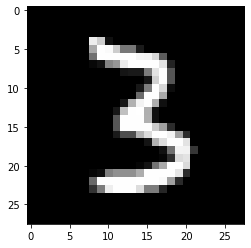

In [6]:
for i , data in enumerate(train_loader):
    x,y = data 
    print(y.shape)
    print(x.shape)
    print(x[0].shape)
    print(x[0])
    plt.imshow(x[0][0].reshape(28,28), cmap='gray') # pixel이 28*28
    print(y[0])
    break

## 2) Model

In [8]:
class MLP_model(torch.nn.Module):
    def __init__(self, input_size, num_classes):
        super(MLP_model, self).__init__()
        self.input_size = input_size
        self.num_classes = num_classes
        self.fc1 = torch.nn.Linear(input_size, 256)
        self.fc2 = torch.nn.Linear(256, 256)
        self.fc3 = torch.nn.Linear(256, num_classes)
        self.relu = torch.nn.ReLU()
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, x):
        
        fc1 = self.fc1(x)
        ac1 = self.relu(fc1)
        
        fc2 = self.fc2(ac1)
        ac2 = self.relu(fc2)
        
        output = self.fc3(ac2)

        
        return output

In [7]:
# Hyperparameters 
input_size = 784  #28*28
num_classes = 10
num_epochs = 5
learning_rate = 0.1


In [9]:
model = MLP_model(input_size, num_classes)

In [10]:
# Loss function, optimizer 
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

## 3)Training

In [11]:
# Training
train_loss = []
for epoch in range(1,num_epochs+1):

    for i, (X_batch, y_batch) in enumerate(train_loader):
        optimizer.zero_grad()
        X_batch = X_batch.reshape(-1, 28*28)
        
        output = model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
        
        
        train_loss.append(loss.item())
        if (i+1)% 200 == 0:
            print("epoch:{}, iter:{} Loss_train:{:.2f}".format(epoch,i+1, train_loss[-1]))
    
           

epoch:1, iter:200 Loss_train:0.47
epoch:1, iter:400 Loss_train:0.42
epoch:1, iter:600 Loss_train:0.25
epoch:2, iter:200 Loss_train:0.27
epoch:2, iter:400 Loss_train:0.22
epoch:2, iter:600 Loss_train:0.14
epoch:3, iter:200 Loss_train:0.12
epoch:3, iter:400 Loss_train:0.23
epoch:3, iter:600 Loss_train:0.14
epoch:4, iter:200 Loss_train:0.17
epoch:4, iter:400 Loss_train:0.10
epoch:4, iter:600 Loss_train:0.09
epoch:5, iter:200 Loss_train:0.12
epoch:5, iter:400 Loss_train:0.05
epoch:5, iter:600 Loss_train:0.07


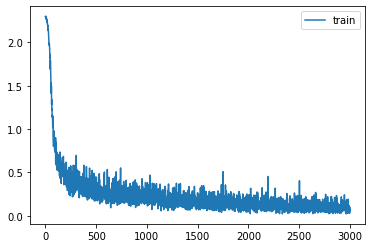

In [12]:
#Loss
plt.figure()
plt.plot(train_loss, label= 'train')
plt.legend(loc = 'upper right')
plt.show()

## 4) Validation

In [13]:
with torch.no_grad():
    correct = 0
    total = 0
    for i, (X_test, y_test) in enumerate(test_loader):
        X_test = X_test.reshape(-1, 28*28)

        outputs = model(X_test)
        outputs_softmax= F.softmax(outputs, dim=1)
        
        predicted = torch.argmax(outputs_softmax.data, dim=1) # max함수-->(가장 큰 값, 그 값의 index), dim=1: dimension 1을 기준으로
        total += y_test.size(0)                             # 총 label의 갯수
        correct += (predicted == y_test).sum().item()
        #predicted == y_test ---> True로 반환, True는 1을 의미하므로 
        #재귀 합을 통해 정답 맞춘 횟수를 Count한다.
    
    accuracy = 100*(correct/ total)
    print('Accuracy of test images: {:.2f} %'.format(accuracy))

Accuracy of test images: 97.69 %


In [ ]:
True +True +False

2